In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# Mouse data and study results

mouse_metadata_df = pd.read_csv("Resources/Mouse_metadata.csv")
study_results_df = pd.read_csv("Resources/Study_results.csv")

In [4]:
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Find any rows with identical Mouse ID and Timepoint values

duplicate_mice = study_results_df[study_results_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [7]:
# All data associated with mouse g989

study_results_df.loc[study_results_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [8]:
# Remove all data associated with mouse g989

study_results_cleaned_df = study_results_df.drop(study_results_df.loc[study_results_df["Mouse ID"] == "g989"].index)
study_results_cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [9]:
# Count the number of mice in the cleaned DataFrame

mice_total = len(study_results_cleaned_df["Mouse ID"].unique())
mice_total

248

In [10]:
# Combine Mouse_metadata and Study_results into one DataFrame

combined_df = pd.merge(study_results_cleaned_df, mouse_metadata_df, on = "Mouse ID")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [11]:
# Tumor sizes based on drug regimen

tumor_stats = combined_df[["Drug Regimen", "Tumor Volume (mm3)"]].copy().groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [12]:
mean_vol = tumor_stats.mean()
median_vol = tumor_stats.median()
stdev_vol = tumor_stats.std()


In [13]:
summary_table = pd.DataFrame({
    "Mean Volume (mm3)": mean_vol,
    "Median (mm3)": median_vol,
    "Standard Deviation (mm3)": stdev_vol,

})

summary_table

,Mean Volume (mm3),Median (mm3),Standard Deviation (mm3)
Drug Regimen,,,
Capomulin,40.675741,41.557809,4.994774
Ceftamin,52.591172,51.776157,6.268188
Infubinol,52.884795,51.820584,6.567243
Ketapril,55.235638,53.698743,8.279709
Naftisol,54.331565,52.509285,8.134708
Placebo,54.033581,52.288934,7.821003
Propriva,52.320930,50.446266,6.622085
Ramicane,40.216745,40.673236,4.846308
Stelasyn,54.233149,52.431737,7.710419


## Bar Charts

In [14]:
# Organize the data to be able to compare the number of mice based on which drug they were given

drug_names = summary_table.index
mice_per_drug = combined_df.groupby("Drug Regimen")["Mouse ID"].value_counts().unique()

drug_counts_df = pd.DataFrame({
    "Drug Regimen": drug_names,
    "Mice": mice_per_drug
}).set_index(["Drug Regimen"])

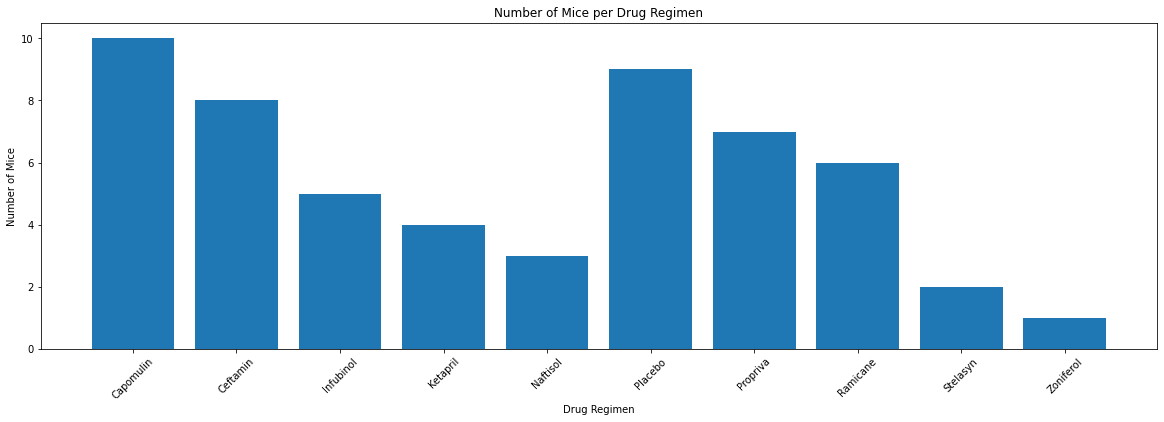

In [15]:
# Bar Chart showing total mice for each treatment using pyplot

plt.figure(figsize = (20,6))
plt.bar(drug_names, mice_per_drug)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

plt.show()

<AxesSubplot:title={'center':'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

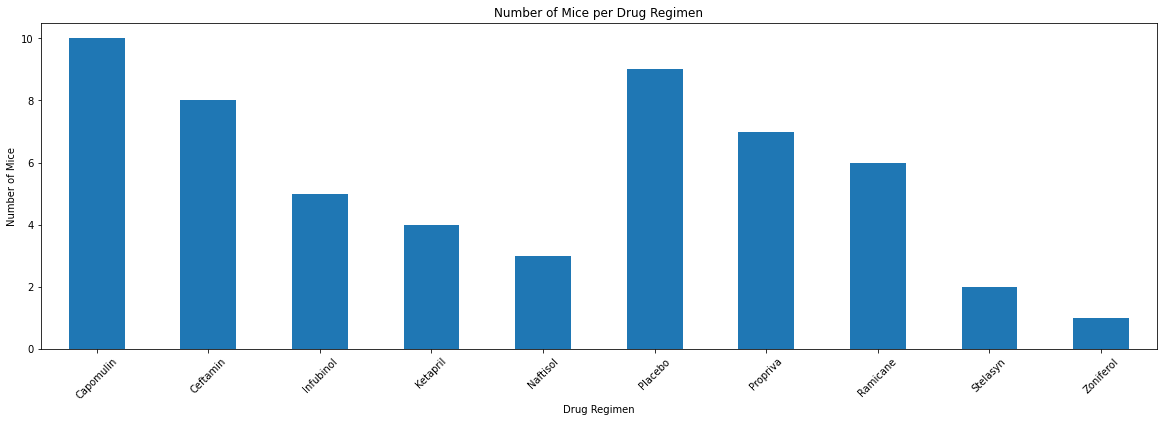

In [16]:
# Bar Chart showing otal mice for each treatment using DataFrame.plot()

drug_counts_df.plot(kind = 'bar',
                    figsize = (20,6),
                    title = "Number of Mice per Drug Regimen",
                    legend = False,
                    xlabel = "Drug Regimen", rot = 45,
                    ylabel = "Number of Mice")

## Pie Charts

In [17]:
# Count the number of males and females

gender_distribution = combined_df["Sex"].value_counts()
gender_distribution

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Gender Distribution'}>

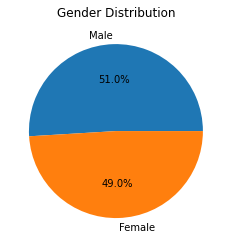

In [18]:
# Gender distribution using pandas

gender_distribution.plot(kind = "pie",
                        ylabel = "",
                        title = "Gender Distribution",
                        autopct = "%1.1f%%"
                        )

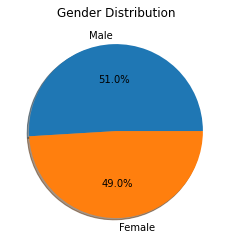

In [19]:
# Gender distribution using pyplot

plt.pie(gender_distribution,
        labels = gender_distribution.index,
        autopct = "%1.1f%%",
        shadow=True
       )
plt.title("Gender Distribution")

plt.show()

## Line Plot

In [20]:
# Tumor size over time of a mouse treated with Capomulin

# Selecting a mouse that was measured at every timepoint
combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].value_counts()

y793    10
m601    10
r944    10
b128    10
j119    10
u364    10
v923    10
l509    10
i738    10
s185    10
s710    10
w914    10
l897    10
i557    10
r554    10
b742    10
g316    10
m957    10
t565    10
x401    10
g288    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [21]:
# Mouse ID i557 survived the trial
c_mouse_id = "i557"

# All information about mouse i557
c_mouse_df = combined_df.loc[combined_df["Mouse ID"] == c_mouse_id]
c_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1845,i557,0,45.000000,0,Capomulin,Female,1,24
1846,i557,5,42.261665,0,Capomulin,Female,1,24
1847,i557,10,42.992077,0,Capomulin,Female,1,24
1848,i557,15,43.529876,0,Capomulin,Female,1,24
1849,i557,20,43.967895,0,Capomulin,Female,1,24
1850,i557,25,44.596219,0,Capomulin,Female,1,24
1851,i557,30,45.261384,0,Capomulin,Female,1,24
1852,i557,35,45.941949,0,Capomulin,Female,1,24
1853,i557,40,46.821070,1,Capomulin,Female,1,24
1854,i557,45,47.685963,1,Capomulin,Female,1,24


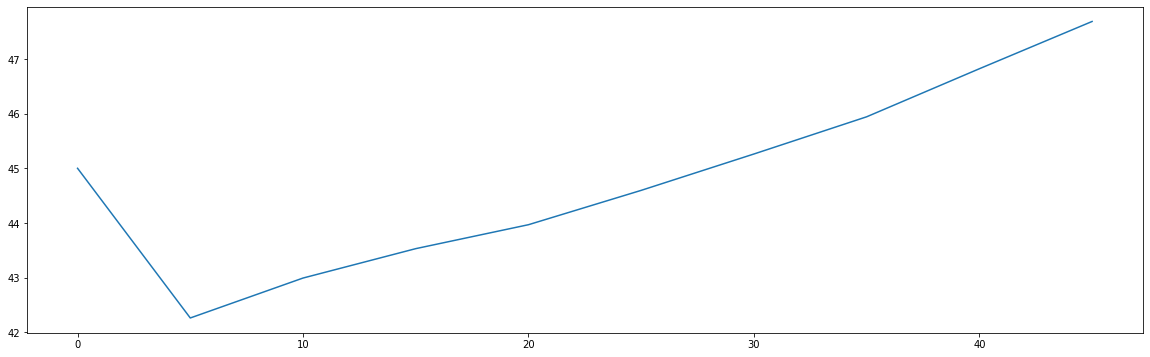

In [22]:
# Line Plot of tumor volume over time

plt.figure(figsize = (20,6))
plt.plot(c_mouse_df["Timepoint"], c_mouse_df["Tumor Volume (mm3)"])

plt.show()

## Scatter Plot

In [23]:
# Average tumor volume for all Capomulin data points

avg_volume = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].mean()
avg_volume

40.675741141

In [24]:
# Check to see if any mouse's weight changed throughout the trial by comparing max and min weight for each mouse
# All mice stayed at the same weight for all measurements

combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].max() == combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].min()

Mouse ID
b128    True
b742    True
f966    True
g288    True
g316    True
i557    True
i738    True
j119    True
j246    True
l509    True
l897    True
m601    True
m957    True
r157    True
r554    True
r944    True
s185    True
s710    True
t565    True
u364    True
v923    True
w150    True
w914    True
x401    True
y793    True
Name: Weight (g), dtype: bool

In [25]:
# Calculate the weight and average tumor volume for each Capomulin mouse

mouse_weight = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


pd.DataFrame({
    "Weight (g)": mouse_weight,
    "Average Tumor Volume": avg_tumor
    
})

,Weight (g),Average Tumor Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


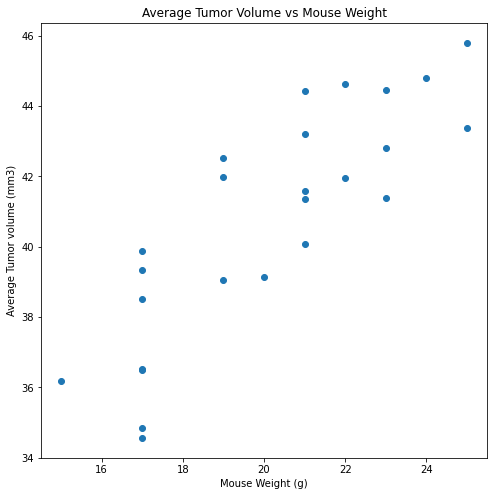

In [26]:
# Scatter Plot of mouse weight vs average tumor volume

plt.figure(figsize = (8, 8))
plt.scatter(mouse_weight, avg_tumor)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight")

plt.show()